In [1]:
import torch
import torchvision.transforms as transforms
import lightning as L

import brain_tumor_dataset as btd

c:\Users\Andreas\anaconda3\envs\deep_learning\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


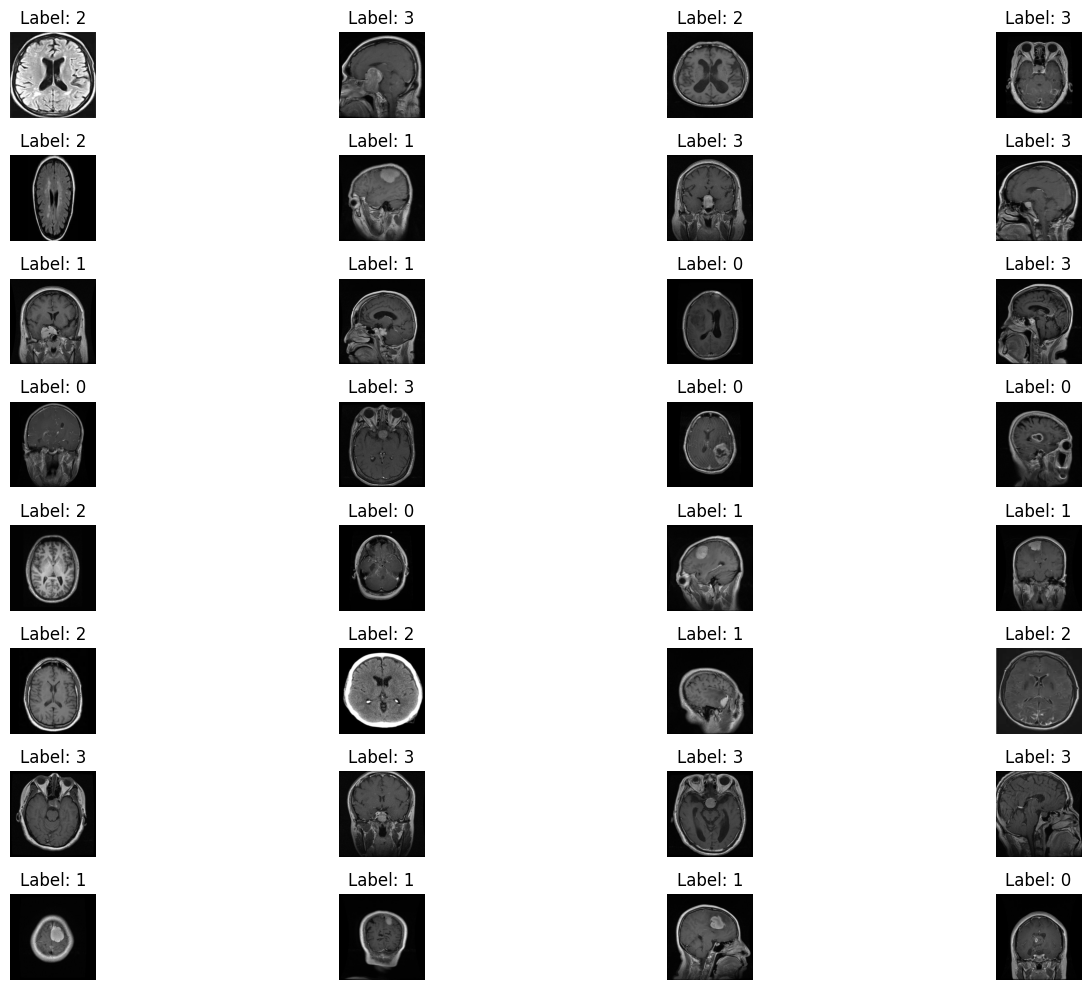

In [2]:
# transform the images to ensure equal size and tensors
transform = transforms.Compose([
	transforms.Resize((512, 512)),
	transforms.ToTensor(),
	transforms.Grayscale()	
])

train_dataset = btd.BrainTumorDataset(btd.TRAIN_DATA_PATH, transform=transform)

# train_dataset = BrainTumorDataset(train_df, train_dir, transform=transform)
test_dataset = btd.BrainTumorDataset(btd.TEST_DATA_PATH, transform=transform)

batch_size = 32

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Display the images in a grid from one batch in the DataLoader
for imgs, labels in train_loader:
    btd.show_image_grid(imgs, labels, rows = batch_size//4, cols = 4)
    break  

In [3]:
class VisionTransformer(L.LightningModule):
    def __init__(self, 
                 embedding_dim=64, 
                 patch_size=32, 
                 num_layers=4, 
                 n_heads=8, 
                 dim_feedforward=64):
        super().__init__()
        self.embedding = torch.nn.Conv2d(
            1, embedding_dim, kernel_size=patch_size, stride=patch_size
        )

        # class token for classification
        self.class_token = torch.nn.Parameter(torch.randn(1, 1, embedding_dim))
        # positional embedding
        self.positional_embedding = torch.nn.Parameter(torch.randn(1, 1, embedding_dim))
        # transformer encoder layer
        self.encoder = torch.nn.TransformerEncoder( # we can add a norm between each encoder layer here
            torch.nn.TransformerEncoderLayer( 
                d_model=embedding_dim, nhead=n_heads, dim_feedforward=dim_feedforward
            ),
            num_layers=num_layers,
            enable_nested_tensor=False,
        )
        
		# linear layer for classification
        # TODO

    def forward(self, x):
        x = self.embedding(x)
        # TODO
        return x


# test with random image
model = VisionTransformer(embedding_dim=8)
imgs, labels = next(iter(train_loader))
output = model(imgs[0])
output = output.flatten(start_dim=1)
print(output.shape)

torch.Size([8, 256])
